In [163]:
import os
import math
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.data import Dataset
from tensorflow.keras import optimizers
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm

In [101]:
data = pd.read_csv('C:/Users/admin/Documents/Bangkit/bangkit-assignment5/Housing.csv', index_col=0)

In [102]:
data.head(5)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [104]:
def convert_yes_no_to_boolean(x, data):
    dataFrame = data[x].replace({"yes": 1, "no": 0}, inplace=True)
    return dataFrame

In [105]:
convert_yes_no_to_boolean('driveway', data)

In [106]:
convert_yes_no_to_boolean('recroom', data)
convert_yes_no_to_boolean('fullbase', data)
convert_yes_no_to_boolean('gashw', data)
convert_yes_no_to_boolean('airco', data)
convert_yes_no_to_boolean('prefarea', data)

In [107]:
data.head(5)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,1,0,1,0,0,1,0
2,38500.0,4000,2,1,1,1,0,0,0,0,0,0
3,49500.0,3060,3,1,1,1,0,0,0,0,0,0
4,60500.0,6650,3,1,2,1,1,0,0,0,0,0
5,61000.0,6360,2,1,1,1,0,0,0,0,0,0


In [108]:
data.describe()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


 price increases till 4 bedroom then descreases
 most data is for 3 and 4 bedroom


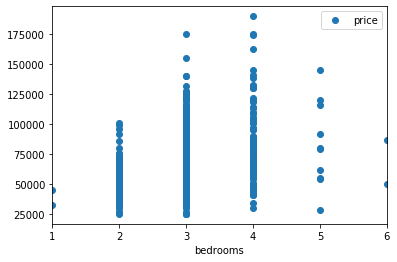

In [109]:
data.plot(x='bedrooms', y='price', style='o') 
print(" price increases till 4 bedroom then descreases")
print(" most data is for 3 and 4 bedroom")

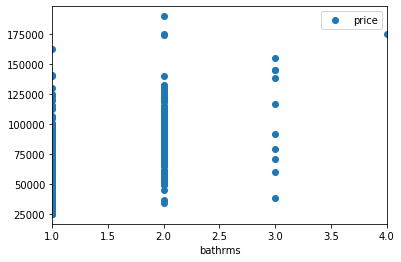

In [110]:
data.plot(x='bathrms', y='price', style='o') 

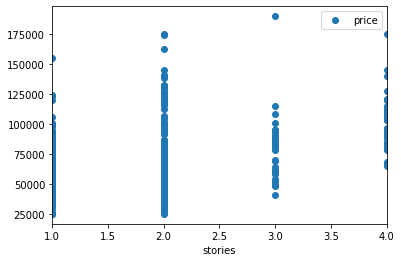

In [111]:
data.plot(x='stories', y='price', style='o') 

lot size seems to be good feature


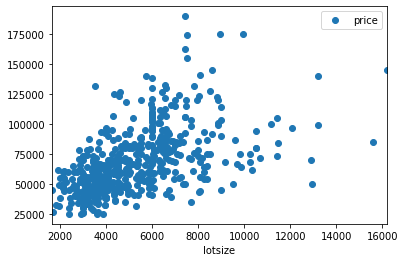

In [112]:
data.plot(x='lotsize', y='price', style='o') 
print ('lot size seems to be good feature')

 seems to be feature vector


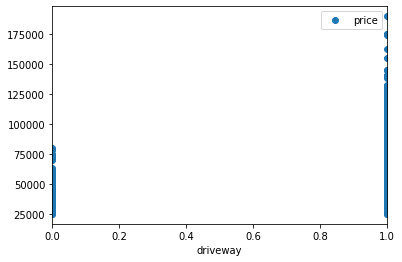

In [113]:
data.plot(x='driveway', y='price', style='o') 
print(" seems to be feature vector")

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


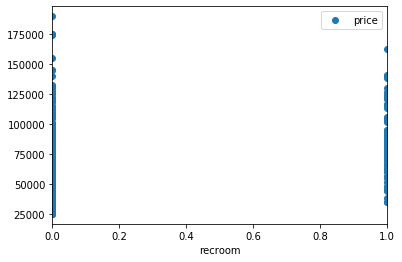

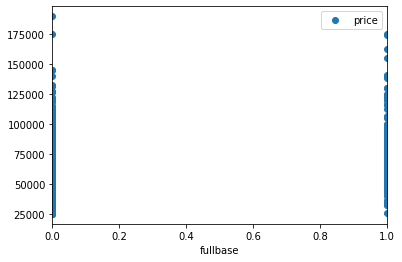

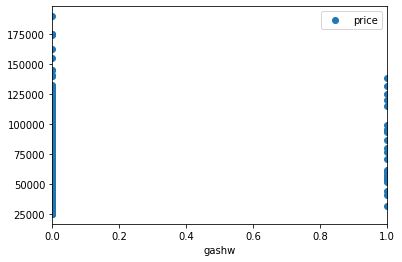

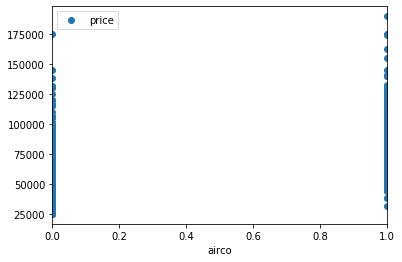

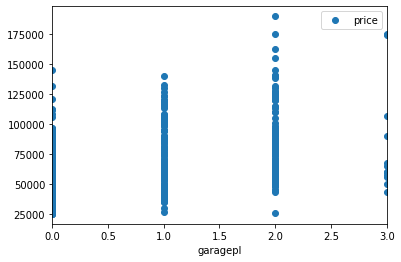

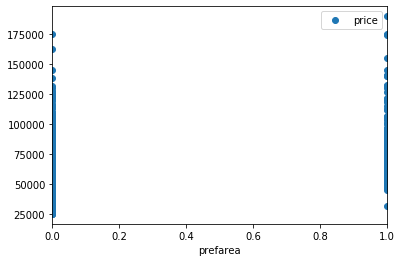

In [114]:
print(data.plot(x='recroom', y='price', style='o'))
print(data.plot(x='fullbase', y='price', style='o'))
print(data.plot(x='gashw', y='price', style='o'))
print(data.plot(x='airco', y='price', style='o'))
print(data.plot(x='garagepl', y='price', style='o'))
print(data.plot(x='prefarea', y='price', style='o'))

In [115]:
#shuffle data
data = data.reindex(np.random.permutation(data.index)) 

In [116]:
data.head(5)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
370,79000.0,6100,3,2,1,1,0,1,0,0,2,1
466,52000.0,2275,3,1,3,1,0,0,1,1,0,1
46,44000.0,2160,3,1,2,0,0,1,0,0,0,0
397,77000.0,6710,3,2,2,1,1,1,0,0,1,1
204,55500.0,3180,4,2,2,1,0,0,0,0,0,0


In [117]:
feature_set = ['lotsize','bedrooms','stories','driveway','garagepl']
target_set = ['price']

In [118]:
data['lotsize'].max()

16200

In [119]:
# pd.cut(data['lotsize'], [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000]).head()

In [120]:
data.head(5)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
370,79000.0,6100,3,2,1,1,0,1,0,0,2,1
466,52000.0,2275,3,1,3,1,0,0,1,1,0,1
46,44000.0,2160,3,1,2,0,0,1,0,0,0,0
397,77000.0,6710,3,2,2,1,1,1,0,0,1,1
204,55500.0,3180,4,2,2,1,0,0,0,0,0,0


In [125]:
# bucketization function
def bucketization(x, df, n):
    bins = [i*2000 for i in range(0,n+1)]
    df[x] = pd.cut(df[x], bins)

In [122]:
# math.ceil(16200/2000)

In [123]:
bucketization('lotsize', data, 9)

In [124]:
data.head(5)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
370,79000.0,"(6000, 8000]",3,2,1,1,0,1,0,0,2,1
466,52000.0,"(2000, 4000]",3,1,3,1,0,0,1,1,0,1
46,44000.0,"(2000, 4000]",3,1,2,0,0,1,0,0,0,0
397,77000.0,"(6000, 8000]",3,2,2,1,1,1,0,0,1,1
204,55500.0,"(2000, 4000]",4,2,2,1,0,0,0,0,0,0


In [126]:
# scalling function
def scalling(x, df, n):
    df[x] = df[x]/n

In [127]:
scalling('price', data, 10000)

In [128]:
data.head(5)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
370,7.90,"(6000, 8000]",3,2,1,1,0,1,0,0,2,1
466,5.20,"(2000, 4000]",3,1,3,1,0,0,1,1,0,1
46,4.40,"(2000, 4000]",3,1,2,0,0,1,0,0,0,0
397,7.70,"(6000, 8000]",3,2,2,1,1,1,0,0,1,1
204,5.55,"(2000, 4000]",4,2,2,1,0,0,0,0,0,0


In [129]:
data.describe()

,price,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,6.812160,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,2.670267,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,2.500000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.912500,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.200000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.200000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,19.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


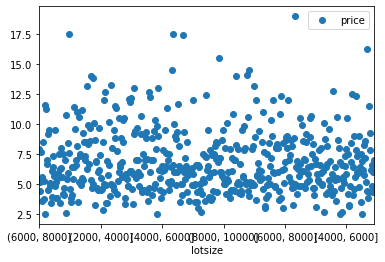

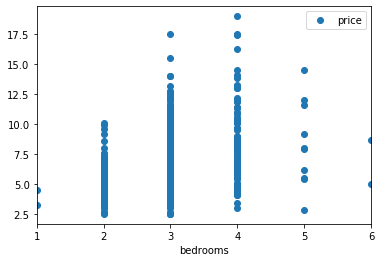

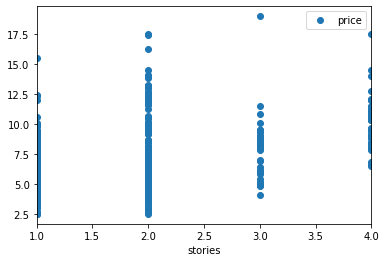

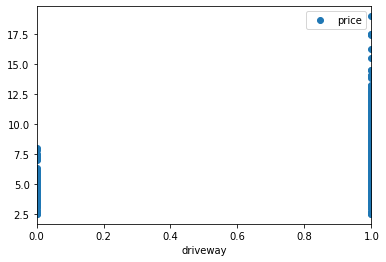

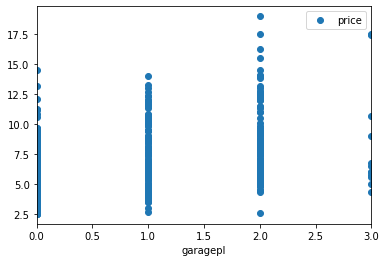

In [130]:
print(data.plot(x='lotsize', y='price', style='o'))
print(data.plot(x='bedrooms', y='price', style='o'))
print(data.plot(x='stories', y='price', style='o'))
print(data.plot(x='driveway', y='price', style='o'))
print(data.plot(x='garagepl', y='price', style='o'))

In [131]:
x = data.drop('price', axis=1)
y = data.price
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [133]:
x_train.head()

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
452,"(4000, 6000]",2,1,1,1,0,0,0,1,0,1
31,"(2000, 4000]",2,1,1,0,0,1,0,0,0,0
14,"(2000, 4000]",3,1,1,0,0,0,0,0,0,0
150,"(4000, 6000]",4,1,2,1,0,0,0,0,0,0
126,"(4000, 6000]",4,2,2,1,0,0,1,0,0,0


In [134]:
x_train.shape

(491, 11)

In [135]:
x_test.head()

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
215,"(2000, 4000]",4,1,2,1,0,0,0,0,2,0
290,"(2000, 4000]",2,1,1,1,0,0,0,0,0,0
545,"(4000, 6000]",3,2,2,1,1,0,0,1,1,0
299,"(4000, 6000]",2,1,1,1,0,0,0,0,0,0
522,"(4000, 6000]",4,2,4,1,1,0,0,1,1,0


In [143]:
def tf_feature_columns(input_features):
    return set([tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features])

In [144]:
x_train = x_train[feature_set]
x_test = x_test[feature_set]
tf_fauture_columns = tf_feature_columns(x_train)

In [145]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(tf_feature_columns)

(491, 5)
(491,)
(55, 5)
(55,)
<function tf_feature_columns at 0x000001462710C0D8>


In [146]:
#features 
#targets
def input_function(features, targets, batch_size, epochs=None):
    features = {key:np.array(val) for key,val in dict(features).items()}
    ds = Dataset.from_tensor_slices((features,targets))
    ds = ds.batch(batch_size).repeat(epochs)
    features, labels = ds.make_one_shot_iterator().get_next()
    return features,labels

In [172]:
# feature_columns: tf_features_ have to check what kind of data it is
# training_features: dataframe: with all input features
# training_target: dataframe: with target feature
def train_model(learning_rate, steps, batch_size, feature_columns, training_features, training_target, validation_features, validation_target,target_column_name):
    periods = 10
    steps_per_period = steps / periods
    
    my_optimizer = tf.compat.v1.train.FtrlOptimizer(learning_rate=learning_rate)
    print('optimizer: ', my_optimizer)
    my_optimizer = optimizers.SGD(my_optimizer, 5.0)
    # tell tf to create linear rregression by telling feature column names and optimizer
    linear_regressor = tf.estimator.LinearRegressor(feature_columns=feature_columns,optimizer=my_optimizer)
    
    training_input_fn = lambda: input_function(training_features, training_target[target_column_name],batch_size)
    # during prediction number of epoch is 1 and batch size is also 1
    predict_training_input_fn = lambda: input_function(training_features, training_target[target_column_name], 1,epochs=1)
    predict_validation_input_fn = lambda: input_function(validation_features, validation_target[target_column_name],1, epochs=1)
    
    print("Training Mode")
    training_rmse = []
    validation_rmse = []
    
    for period in range (0, periods):
        linear_regressor.train(input_fn=training_input_fn,steps=steps_per_period)
        
        training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
        training_predictions = np.array([item['predictions'][0] for item in training_predictions])
        validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
        validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
        training_root_mean_squared_error = math.sqrt(metrics.mean_squared_error(training_predictions, training_target))
        validation_root_mean_squared_error = math.sqrt(metrics.mean_squared_error(validation_predictions, validation_target))
        
        print('period {} training {} validation error {}'.format(period, training_root_mean_squared_error, validation_root_mean_squared_error))
        training_rmse.append(training_root_mean_squared_error)
        validation_rmse.append(validation_root_mean_squared_error)
        
        
    print("Model training finished.")
    
    # logic to plot graph can be common
    plt.ylabel("RMSE")
    plt.xlabel("Periods")
    plt.title("Root Mean Squared Error vs. Periods")
    plt.tight_layout()
    plt.plot(training_rmse, label="training")
    plt.plot(validation_rmse, label="validation")
    plt.legend()
    
    return linear_regressor

In [173]:
_ = train_model(
    learning_rate=0.01,
    steps=900,
    batch_size=20,
    feature_columns=tf_feature_columns,
    training_features=x_train,
    training_target=y_train,
    validation_features=x_test,
    validation_target=y_test,
    target_column_name='price'
    )

optimizer:  <tensorflow.python.training.ftrl.FtrlOptimizer object at 0x0000014627E89788>


ValueError: `momentum` must be between [0, 1].